### T - SNE

### Librerías

In [ ]:
import medmnist
from medmnist import INFO, Evaluator
from medmnist.dataset import DermaMNIST

from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import dataset_without_pytorch
from dataset_without_pytorch import get_loader

from matplotlib.colors import ListedColormap

### Carga y preparación de datos para MNIST Dermatology

Carga y prepara el conjunto de datos DermMNIST para el entrenamiento de un modelo. Configura parámetros clave como épocas, tamaño de lote y tasa de aprendizaje, obtiene la clase del dataset, y organiza los datos en un DataLoader para facilitar su procesamiento en lotes

In [ ]:
data_flag = 'dermamnist'
download = True

NUM_EPOCHS = 3 #Epocas (3)
BATCH_SIZE = 128 #Lote tamanio
lr = 0.001 #Alpha - tasa de aprendizaje

info_28 = INFO[data_flag] # Info
task_28 = info_28['task'] # Tarea asociada
n_channels_28 = info_28['n_channels'] # Num canales RGB
n_classes_28 = len(info_28['label']) # Num clases

# Obtener dinamicamente la clase del conjunto de datos desde un modulo
DataClass_28 = getattr(dataset_without_pytorch, info_28['python_class'])


# Cargar el conjunto de datos
train_dataset_28 = DataClass_28(split='train', download=download)

# Encapsular los datos en un DataLoader para hacer lotes
train_loader_28 = get_loader(dataset=train_dataset_28, batch_size=BATCH_SIZE)

Using downloaded and verified file: C:\Users\matun\.medmnist\dermamnist.npz


Acceso Directo a Imágenes y Etiquetas del Conjunto de Datos de Entrenamiento

In [ ]:
images = train_dataset_28.imgs
labels = train_dataset_28.labels

### Visualización de Imágenes DermMNIST con t-SNE por Clases

Se aplana las imágenes del conjunto de datos DermMNIST y aplica el algoritmo t-SNE para reducir la dimensionalidad a dos componentes, lo que permite visualizar la distribución de las clases en un espacio 2D. Se utiliza un mapa de colores para diferenciar las clases

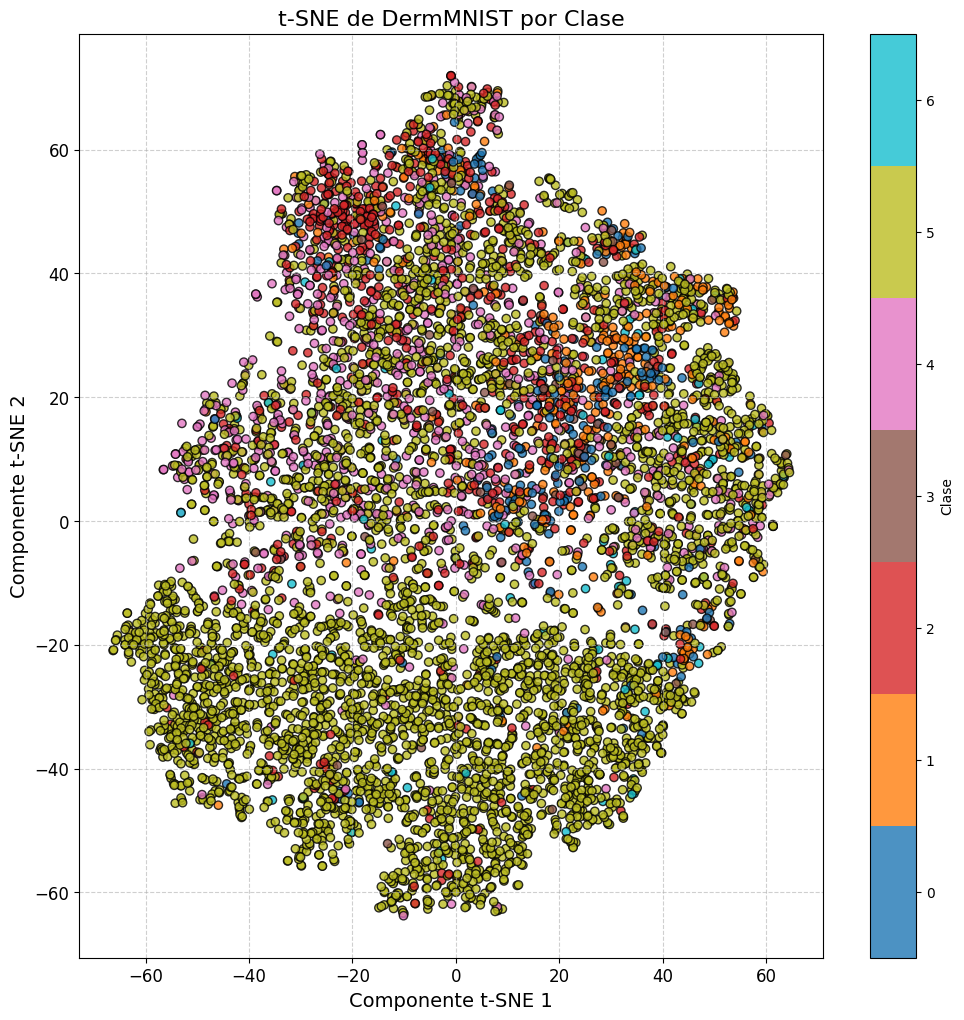

In [ ]:
# Aplanar las imágenes
flat_images = images.reshape(images.shape[0], -1)


unique_labels = np.unique(labels)
num_classes = len(unique_labels)
cmap = plt.get_cmap('tab10', num_classes) 

# Aplicar t-SNE
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30)
tsne_results = tsne.fit_transform(flat_images)

# Graficar los resultados
plt.figure(figsize=(12, 12))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap=cmap, alpha=0.8, edgecolor='k')
plt.colorbar(scatter, ticks=range(num_classes), label='Clase') 
plt.clim(-0.5, num_classes - 0.5)

# Configuración adicional para los ejes y título
plt.title('t-SNE de DermMNIST por Clase', fontsize=16)
plt.xlabel('Componente t-SNE 1', fontsize=14)
plt.ylabel('Componente t-SNE 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
